<a href="https://colab.research.google.com/github/harim061/FakeNewsDetection/blob/main/FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize
import re
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"fake_or_real_news.csv")
df.info(verbose=False)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Columns: 4 entries, Unnamed: 0 to label
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.columns.to_list()
df.drop('Unnamed: 0', axis=1, inplace=True) #drop unnamed an title columns
df.drop('title', axis=1, inplace=True)
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [4]:
df.describe()

,text,label
count,6335,6335
unique,6060,2
top,"Killing Obama administration rules, dismantlin...",REAL
freq,58,3171


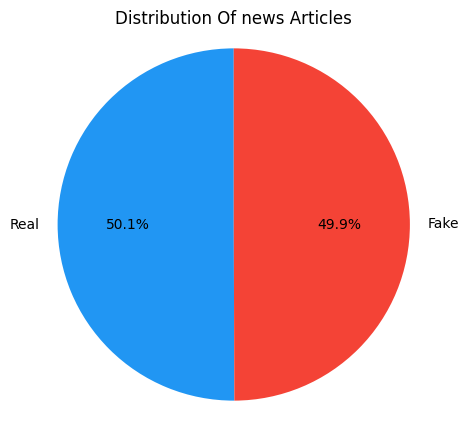

In [5]:
fig = plt.figure(figsize=(5,5))
labels = 'Real', 'Fake'
counts = df.label.value_counts().values
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#2196f3', '#f44336' ])
plt.axis('equal')
plt.title("Distribution Of news Articles")
plt.show()

In [6]:
# assign variables
X = df.text.values      # independent variable
y = df.label.values      # dependent variables

y = (y=="FAKE") * 1
y

array([1, 1, 0, ..., 1, 0, 0])

In [8]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-07-29 15:17:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-07-29 15:17:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-07-29 15:17:22--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [19]:
!unzip -q glove.6B.100d.txt

[glove.6B.100d.txt]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.100d.txt or
        glove.6B.100d.txt.zip, and cannot find glove.6B.100d.txt.ZIP, period.


In [13]:
!ls
!pwd

fake_or_real_news.csv  glove.6B.200d.txt  glove.6B.50d.txt  sample_data
glove.6B.100d.txt      glove.6B.300d.txt  glove.6B.zip
/content


In [20]:
#word embedding converted to lists
import os
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [30]:
def get_embedding(word):
    emb = embeddings_index.get(word, [0] * 100)
    return emb

In [31]:
# vectorize the text  all in minus or mayus as they have to be the same

def preprocess_text(text):
    lower = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', lower)
    x= re.sub(r'^RT[\s]+', '', text)
    x= re.sub(r'https?://[^\s\n\r]+', '', x)
    x= re.sub(r'#','', x)
    x= re.sub("[^a-zA-Z0-9]", " ", x)
    x = word_tokenize(x)
    emb = np.zeros((100,))
    for word in x:
        emb += get_embedding(word)
    emb = emb / len(x)
    return emb

#Word embeddings each column is a word represented in numbers to explain the computer the context of each word in a text corpus

In [25]:
!pip install nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
preprocess_text ('today was a earthquake in Indiana')[:10]

array([ 0.07845183,  0.24976267,  0.30990167, -0.15347168,  0.135445  ,
        0.08859167,  0.270002  ,  0.28536083, -0.27165783,  0.31795333])

In [33]:
X_procesado = []
for article in X:
    X_procesado.append(preprocess_text(article))

<ipython-input-31-2cc0e971ba39>:14: RuntimeWarning: invalid value encountered in true_divide
  emb = emb / len(x)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, stratify= y, train_size = 0.9, shuffle = True, random_state = 0 )

In [35]:
def replace_nan_with_zero(arr):

    result = np.apply_along_axis(np.nan_to_num, 1, arr)

    return result

X_train = np.asarray(X_train)
X_train = replace_nan_with_zero(X_train)

X_test = np.asarray(X_test)
X_test = replace_nan_with_zero(X_test)

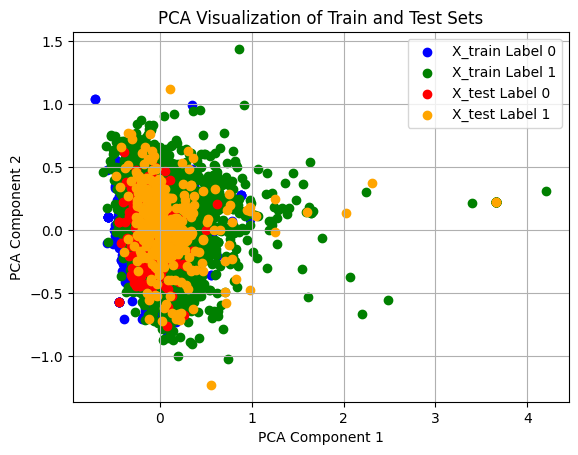

In [36]:
from sklearn.decomposition import PCA

X = np.vstack((X_train, X_test))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca = X_pca[:len(X_train)]
X_test_pca = X_pca[len(X_train):]

plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], color='blue', label='X_train Label 0')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='green', label='X_train Label 1')
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color='red', label='X_test Label 0')
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color='orange', label='X_test Label 1')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Train and Test Sets')
plt.grid()
plt.legend()

# Display the plot
plt.show()

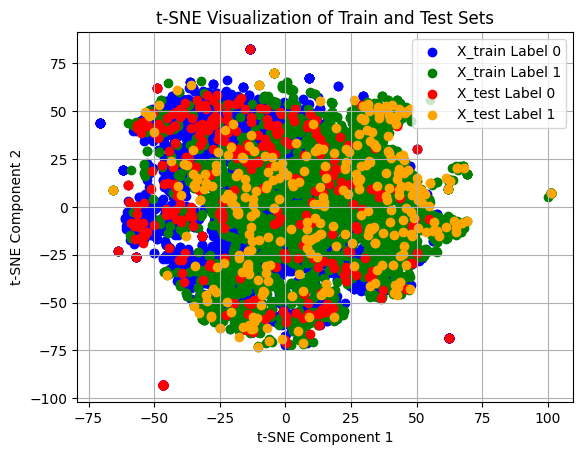

In [37]:
from sklearn.manifold import TSNE


X = np.vstack((X_train, X_test))

tsne = TSNE(n_components=2, perplexity=30 , learning_rate= 200)
X_tsne = tsne.fit_transform(X)

X_train_tsne = X_tsne[:len(X_train)]
X_test_tsne = X_tsne[len(X_train):]

plt.scatter(X_train_tsne[y_train == 0, 0], X_train_tsne[y_train == 0, 1], color='blue', label='X_train Label 0')
plt.scatter(X_train_tsne[y_train == 1, 0], X_train_tsne[y_train == 1, 1], color='green', label='X_train Label 1')
plt.scatter(X_test_tsne[y_test == 0, 0], X_test_tsne[y_test == 0, 1], color='red', label='X_test Label 0')
plt.scatter(X_test_tsne[y_test == 1, 0], X_test_tsne[y_test == 1, 1], color='orange', label='X_test Label 1')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Train and Test Sets')
plt.grid()
plt.legend()

# Display the plot
plt.show()

In [38]:
def plot_decision_boundary(X, y, model, ax, title):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

In [39]:
clf = MLPClassifier(alpha=0.001, hidden_layer_sizes=(400, 5), random_state=1, early_stopping= True, activation= 'relu', learning_rate= 'adaptive')

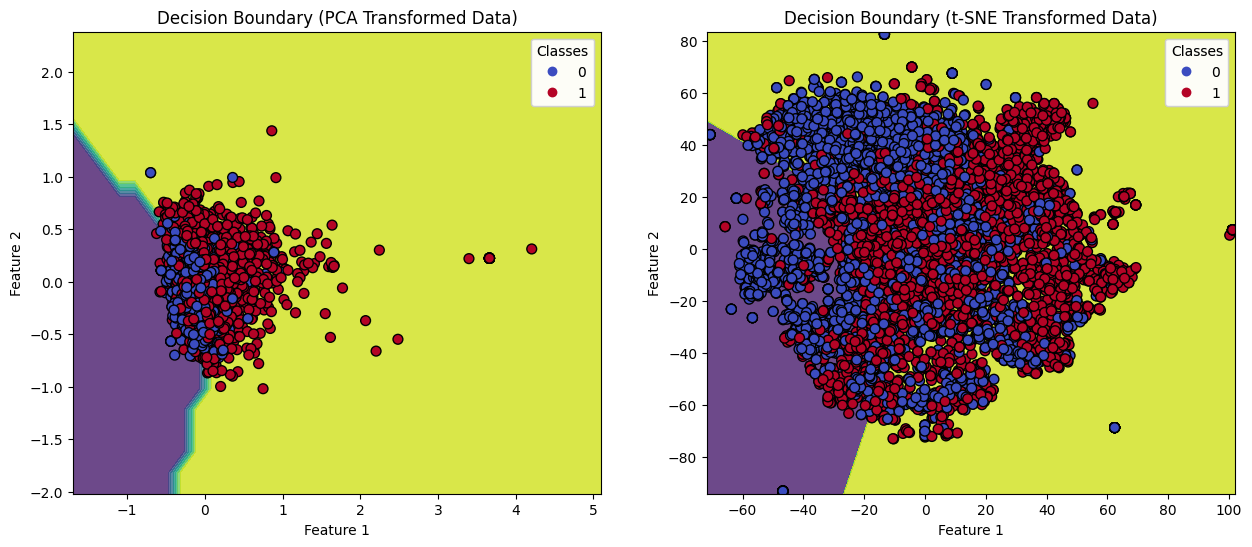

In [40]:
clf.fit(X_train_pca, y_train)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_decision_boundary(X_train_pca, y_train, clf, axes[0], 'Decision Boundary (PCA Transformed Data)')
plot_decision_boundary(X_train_tsne, y_train, clf, axes[1], 'Decision Boundary (t-SNE Transformed Data)')

plt.show()

In [41]:
from sklearn.metrics import f1_score
# Train and evaluate the classifier on the original data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred)
f1_orig = f1_score(y_test, y_pred)

# Train and evaluate the classifier on PCA transformed data
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

# Train and evaluate the classifier on t-SNE transformed data
clf.fit(X_train_tsne, y_train)
y_pred_tsne = clf.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
f1_tsne = f1_score(y_test, y_pred_tsne)

# Create a pandas DataFrame to store the results
results = pd.DataFrame({
    'Accuracy': [accuracy_orig, accuracy_pca, accuracy_tsne],
    'F1 Score': [f1_orig, f1_pca, f1_tsne]
}, index=['Original Data', 'PCA Transformed Data', 't-SNE Transformed Data'])

# Display the results
print(results)

                        Accuracy  F1 Score
Original Data           0.858044  0.865269
PCA Transformed Data    0.722397  0.705686
t-SNE Transformed Data  0.757098  0.761610


In [42]:
clf.fit(X_train, y_train)
def classify(texto):
    entrada=preprocess_text(texto).reshape(1,-1)
    resultado = clf.predict(entrada)
    if resultado [0] == 1:
        print('Fake News')
        print(resultado.shape)
    else:
        print('Real News')
    return resultado

In [50]:
classify("""
An unfounded belief Covid vaccines are leading to a rise in heart problems, especially in young athletes, has been amplified by Twitter owner Elon Musk.

Bronny James - son of basketball legend LeBron James - suffered a cardiac arrest on Monday while practising.

In a tweet about the incident, Mr Musk said that "we cannot ascribe everything to the Covid vaccine, but by the same token we cannot ascribe nothing".

But there is no evidence to support the implication vaccines might be involved.

Mr James' family has thanked the doctors who helped him, and asked for privacy.

Twitter - which is in the process of rebranding itself as X - allows its users to produce "community notes". These notes add further information to any Tweet considered misleading.

A community note contextualising Mr Musk's comments initially appeared under his tweet, but it was removed overnight.

It's not clear whether the note was removed by Twitter or because it was "downvoted" by other users.

Twitter has not yet responded to our request for comment.

In his tweet, Mr Musk also wrote that, "myocarditis is a known side effect," in response to a post detailing Mr James' hospital admission.

We have no information to suggest Mr James's cardiac arrest was linked to myocarditis - inflammation of the heart muscle - or to the vaccine.

Pfizer and Moderna's Covid vaccines have been linked to relatively rare cases of myocarditis, but crucially, studies suggest this does not lead to have a higher risk of having a cardiac arrest.
""")

Fake News
(1,)


array([1])

In [47]:
classify("""
Saudi oil giant Aramco has announced a record profit of $161.1bn (£134bn) for 2022, helped by soaring energy prices and bigger volumes.

It represents a 46.5% rise for the state-owned company, compared with last year.

It is the latest energy firm to report record profits, after energy prices spiked following Russia's full-scale invasion of Ukraine in February 2022.

America's ExxonMobil made $55.7bn, and Britain's Shell reported $39.9bn.

Aramco also declared a dividend of $19.5bn for the October to December quarter of 2022, to be paid in the first quarter of this year.

Most of that will go to the Saudi government, which owns nearly 95% of the shares in the company.

Brent crude oil, the benchmark oil price, now trades at around $82 a barrel - though prices exceeded $120 a barrel last March, after Russia's invasion, and June.

"Aramco rode the wave of high energy prices in 2022," said Robert Mogielnicki of the Arab Gulf States Institute in Washington. "It would have been difficult for Aramco not to perform strongly in 2022."

White House calls Exxon record profit 'outrageous'
Shell reports highest profits in 115 years
In a statement on Sunday, Aramco said the company results were "underpinned by stronger crude oil prices, higher volumes sold and improved margins for refined products".

Aramco's president and CEO Amin Nasser said: "Given that we anticipate oil and gas will remain essential for the foreseeable future, the risks of underinvestment in our industry are real - including contributing to higher energy prices."

To address those challenges, he said, the company would not only focus on expanding oil, gas and chemicals production - but also invest in new lower-carbon technologies.

Aramco - the world's second-most valuable company only behind America's Apple - is a major emitter of greenhouse gas emissions that contribute to climate change.

Responding to Aramco's announcement, Amnesty International's secretary general Agnès Callamard said: "It is shocking for a company to make a profit of more than $161bn in a single year through the sale of fossil fuel - the single largest driver of the climate crisis."

She added: "It is all the more shocking because this surplus was amassed during a global cost-of-living crisis and aided by the increase in energy prices resulting from Russia's war of aggression against Ukraine."

Saudi Arabia is the largest producer in the oil cartel Opec (Organization of the Petroleum Exporting Countries).

The Gulf kingdom has been condemned for a range of human rights abuses: its involvement in the conflict in neighbouring Yemen, the murder in 2018 of journalist Jamal Khashoggi, for jailing dissidents, and for the widespread use of capital punishment.

In a separate development on Sunday, Iran said its oil exports had reached their highest level since the re-imposition of US sanctions in 2018.

Oil Minister Javad Owji said exports increased by 83 million barrels in 2022 compared with the previous 12 months. In Iran, a new year starts in March.

Analysts say the rise is due to greater shipments to Iranian allies China and Venezuela.

Tehran's export revenues took a significant hit after then-US President Donald Trump pulled out of a landmark nuclear deal five years ago.

The US sanctions, coupled with economic mismanagement and corruption, have meant that the Iranian economy has not had any substantive growth in the past decade. And by some measures, it is still 4-8% smaller than it was back in 2010.
""")

Real News


array([0])

In [51]:
classify("""
Serhiy Starushko and his journalist colleagues had just finished their morning editorial meeting in early March when Russian military vehicles drew up outside.

Within minutes, soldiers stormed through the front doors of the three-storey building, home to a local news station in the occupied Ukrainian port city of Berdyansk.

About 50 employees were held hostage for five hours.

They had become victims of the real-world fight to control the flow of information.

Russian forces are occupying towns, threatening journalists and demanding they spread pro-Kremlin views. Those who refuse are forced to close down their operations.

The strategy to replace Ukrainian media with pro-Kremlin press coverage includes capturing transmitter towers and switching off access to national Ukrainian news programmes in areas controlled by Russian forces. Instead, signals for pro-Russian broadcasts are switched on.

The State Special Communications Service of Ukraine told the BBC that eight stations are being used to air "propaganda and disinformation" to the local population in southern Ukraine.

         """)

Fake News
(1,)


array([1])